# Interpolation in Two-Dimensional Domains

[Previous Notebook: Piecewise Interpolation](./NB 2 LAGRANGE1D.ipynb)

[Next Notebook: Application](./NB 4 FULL SOL.ipynb)

## Introduction

From the geometric pointof view a **finite element** is just a canonical spatial domain described by nodal points and the corresponding set of interpolation (or shape) functions. Here we will extend the one-dimensional interpolation scheme to a two-dimensional domain. This will be the first formal definition of a finite element in the course.

## Two-dimensional domain
Consider the two-dimensional square domain shown in the figure and where we want to approximate, via interpolation, a scalar (or vector) valued fuction $f=f(x,y)$. For that purpose the black-dots in the figure, represent nodal or sampling points where the function is assumed to be known. As discussed in the **Class Notes (Section 1.4)** the interpolating polynomial, in this case denoted by $p(x,y)$ is built like:

$$p(x,y) = N^Q(x,y)f^Q$$

where $Q = 1,...,N$ for a N-noded domain and where $N^Q(x,y)$ are the interpolating polynomials which in the context of the finite element method these are called **Shape Funtions**.

To built the bi-dimensional interpolation functions $ N^Q(x,y)$ we actually perform an iterated one-dimensional interpolation as described next.

In the square domain, shown in the figure below $x^A$ and $x^B$ are the x-coordinates of points A and B respectively. Assume we would like to find the value of the function at point A.

<center><img src="https://bit.ly/2TPtrpe" alt="Element" style="width:300px"></center>

Point A has an arbitrary y-coordinate and a constant $x = x^A$ x-ccordinate, thus for an arbitrary A-point along the 1-4 direction (see figure below) the interpolation scheme is still one-dimensional with only y-dependence as indicated by the label $f(y , x= A)$ in the figure. Using one-dimensional Lagrange polynomials this y-dependence can be captured by:

$$f(x^A , y) = L^1(y)f^1 + L^4(y)f^4$$


<center><img src="https://bit.ly/2G54pz8" alt="1direction" style="width:300px"></center>

Proceeding similarly for an arbitrary point B along the 2-3 directions leads to:

$$f(x^B , y) = L^2(y)f^2 + L^3(y)f^3.$$

With $f^A$ and $f^B$ known the x-dependence can now be captured like:

$$f(x,y) = L^A(x) f(x^A,y) + L^B(x)f(x^B,y).$$

To arrive at the final 2D-shape functions we compute the polynomials $L^2(y)$, $L^3(y)$, $ L^A(x)$ and $ L^B(x)$ and replace them in the expressions above. In the case of a canonical element of side 2.0 the functions are:

\begin{align*}
N^1(x,y) & = L^1(x)L^1(y) \equiv \frac14(1-x)(1-y)\\
N^2(x,y) & = L^2(x)L^1(y) \equiv \frac14(1+x)(1-y)\\
N^3(x,y) & = L^2(x)L^2(y) \equiv \frac14(1+x)(1+y)\\
N^4(x,y) & = L^1(x)L^2(y) \equiv \frac14(1-x)(1+y).
\end{align*}


Since along each line 1-4 or 2-3 one-dimensional interpolation is being used, the formulated element is termed a bi-linear element.

In [1]:
%matplotlib notebook        
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from scipy import interpolate

### A Canonical Finite Element

In this subroutine we code the final form $N^Q(x,y)$ of the shape functions instead of directly computing the fundamental 1D-polynomials of the form $L^I(y)$. The subroutine stores the functions in a matrix which depends on $x$ and $y$. Here we assume that the element is a perfect square of side $\mathcal l=2.0$ with nodal points at the corners thus allowing for linear interpolation along each face.

In [2]:
def sha4(x,y):
    """
    Compute the shape functions for bi-linear
    square element of size 2.0.
    """
    sh=sym.zeros(4)
    sh[0] =(1.0/4.0)*(1 - x)*(1 - y)
    sh[1] =(1.0/4.0)*(1 + x)*(1 - y)
    sh[2] =(1.0/4.0)*(1 + x)*(1 + y)
    sh[3] =(1.0/4.0)*(1 - x)*(1 + y)
#
    return sh

This square-element is a canonical or reference element where it is easy to conduct the interpolation operation. In an actual finite element discretization the resulting quad elements are expected to be distorted with respect to this canonical element. In this cases interpolation is still conducted in the space of the canonical element and geometry and functions are nicely transformed using simple mathematics. Thes details will be discussed later. 

The shape functions stored in the subroutine correspond to:

$$\frac14\begin{bmatrix}(1-x)(1-y)&(1+x)(1-y)&(1+x)(1+y)&(1-x)(1+y)\end{bmatrix}$$

In [3]:
x , y= sym.symbols('x y')
H = sha4(x , y)

### Interpolation

Now, let us define a grid of points where the function will be interpolated using the 'numpy' function mgrid. Notice that the system of reference is placed at the center of the element thus $x\in\lbrack-1\;,\;1\rbrack$  and $y\in\lbrack-1\;,\;1\rbrack$. The 1D array USOL[] will store the value interpolated at each point of the grid.

In [4]:
li=-1.0
ls= 1.1
dl= 0.1
npts=int((ls-li)/dl)
USOL = np.zeros((npts, npts, 1))
xx, yy = np.mgrid[li:ls:npts*1j, li:ls:npts*1j]

To conduct the interpolation we will assume known nodal values of the function at a given point $(x , y)$ so we can obtain the interpolated value like:

$$u(x,y)\;=\;\left[H(x,y)\right]\left\{u\right\}$$

<IPython.core.display.Javascript object>


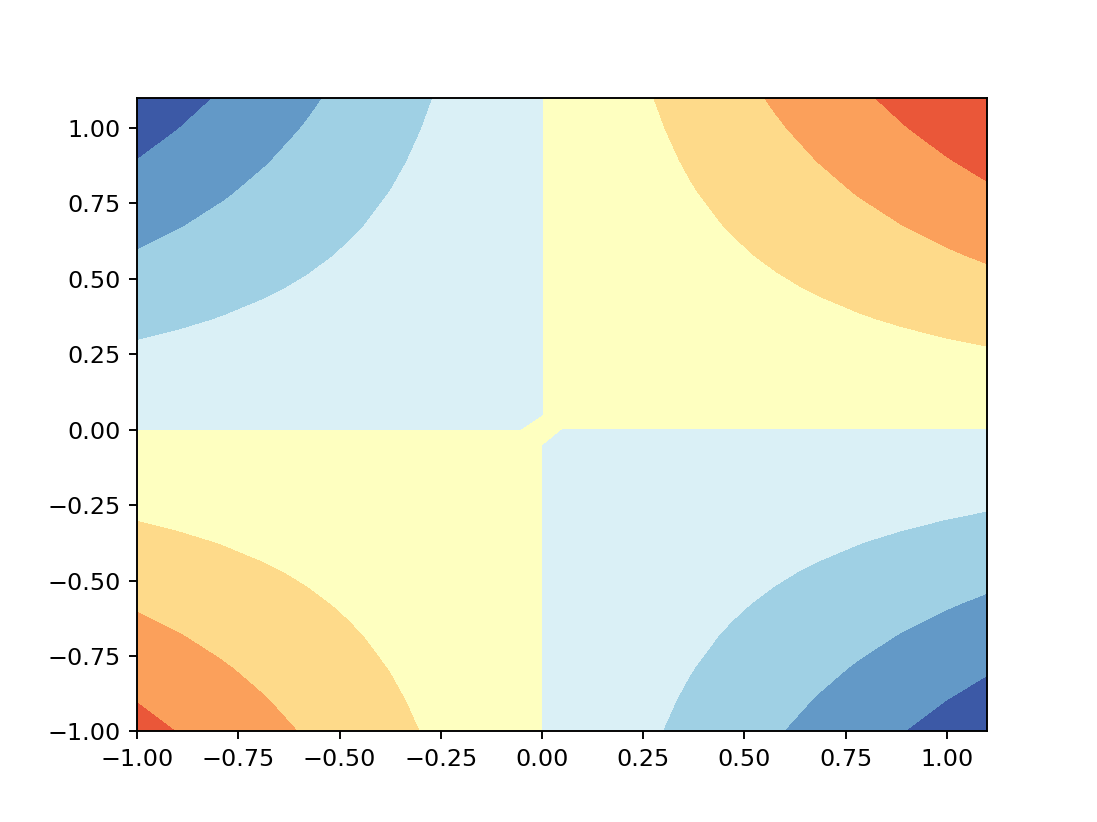

In [6]:
#Try different values of the function at the nodal points
u = sym.Matrix(4, 1, [-0.2 ,0.2 ,-0.2 , 0.2])
#
for i in range(npts):
    for j in range(npts):
        NS =H.subs([(x, xx[i,j]), (y, yy[i,j])])
        up  = NS*u
        USOL[i, j, 0] = up[0]
plt.figure(1)
plt.contourf(xx , yy , USOL[:,:,0], cmap="RdYlBu")

### Class activity
**Problem 1**

Extend the 2D interpolation scheme discussed above to the case of a vector valued function in the context of linear elasticity. For that purpose:

* Assume that at each nodal point of the square domain the displacement vector with horizontal and vertical componentes denoted by $u$ and $v$ respectively is known.
* Using these nodal values compute the horizontal and vertical displacement components over the element.
* Using these same nodal values compute the strain field given by:

$$\varepsilon_{xx}=\frac12\left(\frac{\partial u}{\partial x}\right)$$

$$\varepsilon_{yy}=\frac12\left(\frac{\partial v}{\partial y}\right)$$

$$\gamma_{yy}=\left(\frac{\partial u}{\partial y}+\frac{\partial v}{\partial x}\right)$$

* Store the shape function derivatives in a separate matrix $B$.

**Problem 2**

In a realistic finite element problem and due to geometric irregularities in the computational domain all the elements of the mesh would have different geometric paramters. These differences not only complicate the interpolation process but even create serious problems on coding a systematic approach. In practice every real (distorted) element is transformed to a canonical element in such a way that the interpolation process is conducted in the canonical space. The figure below shows the relation between these two spaces emphasizing the fact that there is a one to one connecion between a point in both spaces. The mathematical details of the transformation are provided in the **Class Notes.**

<center><img src="https://bit.ly/2GeWJK5" alt="Element" style="width:500px"></center>

* Compute the transformation between the distorted and canonical element spaces required to conduct two-dimensional interpolation in a realistic case.

In [6]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()